In [1]:
# ignora avisos
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob         
import numpy as np
import seaborn as sb
from os import listdir
from os.path import isfile, join
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [2]:
mes = {
    '01': 'JANEIRO',
    '02': 'FEVEREIRO',
    '03': 'MARÇO',
    '04': 'ABRIL',
    '05': 'MAIO',
    '06': 'JUNHO',
    '07': 'JULHO',
    '08': 'AGOSTO',
    '09': 'SETEMBRO',
    '10': 'OUTUBRO',
    '11': 'NOVEMBRO',
    '12': 'DEZEMBRO'
}

param = 'idade'

In [3]:
# carrega arquivo em dafaframe / exclui NaNs
def loadDataFrame(file):
    df = pd.read_csv(file, sep=';')
    df.dropna(inplace = True)
    return df

# prepara dataframe
def prepareDataframe (df, parameter):
    # exclui colunas irrelevantes
    df = df[['saldomovimentação', parameter]]
    # substitui magic numbers
    df['saldomovimentação'] = df['saldomovimentação'].map({1: 'Admissões', -1: 'Demissões'})
    createAgBrackets(df)
    return df

# cria coluna 'Faixa Etária' com base em faixas de 10 anos, até os 74aa
def createAgBrackets (df):
    passos = int((df['idade'].max() - df['idade'].min()) / 10)
    idade = df['idade'].min()
    for i in range(passos-2):
        idade_2 = idade + 10
        df.loc[(df['idade']>=idade) & (df['idade']<idade_2), 'Faixa Etária'] = str(int(idade)) + '-' + str(int(idade+9))
        idade = idade_2
    df.loc[(df['idade']>=idade), 'Faixa Etária'] = str(int(idade)) + '+'
    df.loc[(df['idade'].isnull()), 'Faixa Etária'] = 'Não informado'

# gera gráficos
def generateChart(df, parameter, competencia, requisito):
    ax = pd.pivot_table(
        df,
        columns=df['saldomovimentação'],
        index=df[parameter],
        values=parameter,
        aggfunc='count',
        fill_value=0
    ).plot.bar(
        figsize = (10,6),
        color=['#2f4b7c','#f95d6a'],
        xlabel= requisito.title()
    )
    # configuração do gráfico
    ax.legend(bbox_to_anchor=(1.2, 0), loc='lower right')
    ax.ticklabel_format(axis='y',style='plain', )
    plt.xticks(rotation=0)
    # insere thousand separator
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(
        lambda x, p: format(int(x), ',')))
    ax.set_title("PESSOAS ADMITIDAS E DEMITIDAS POR " + requisito.upper() + " EM "+ competencia)

In [4]:
# verificar arquivos com o padrão CAGEDMOV no diretorio
diretorio = "/Users/mariaclara1985/Documents/3_fatec_bd/6SEM/bd-n-estruturado/novocaged/"
arquivos = [f for f in listdir(diretorio) if isfile(join(diretorio, f)) and 'CAGEDMOV' in f]
arquivos.sort()

# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:


## - Faixa Etária

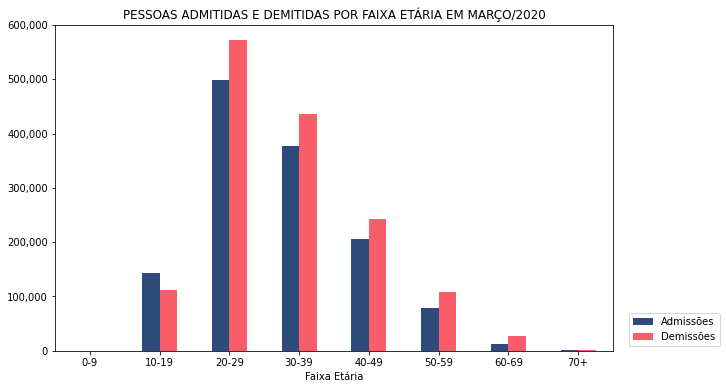

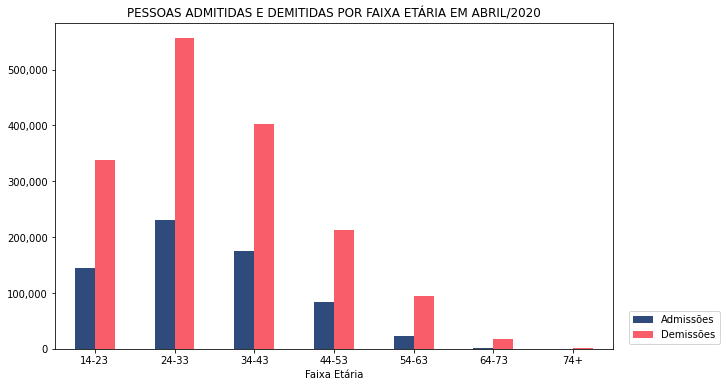

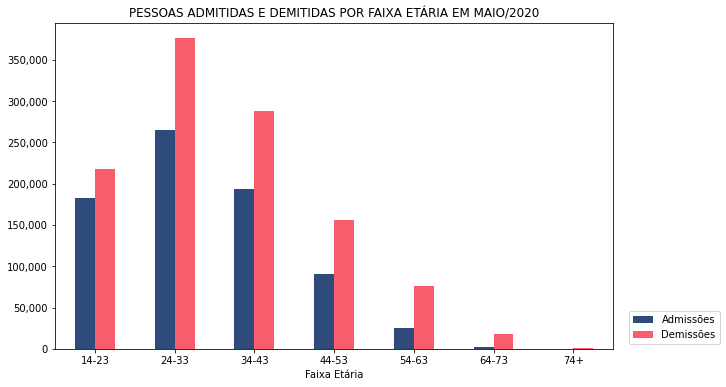

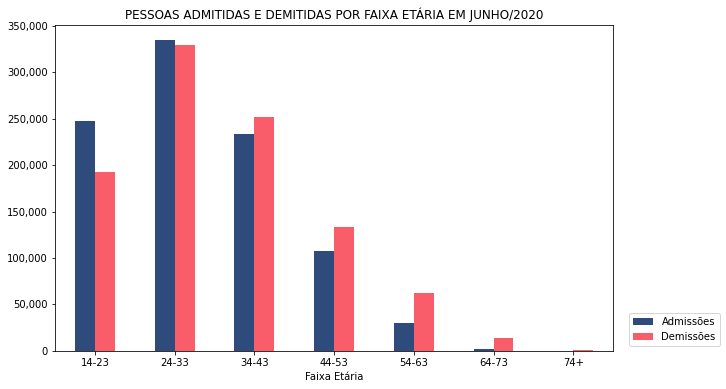

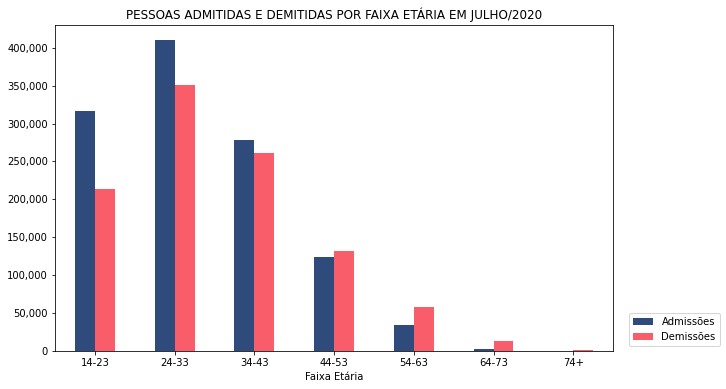

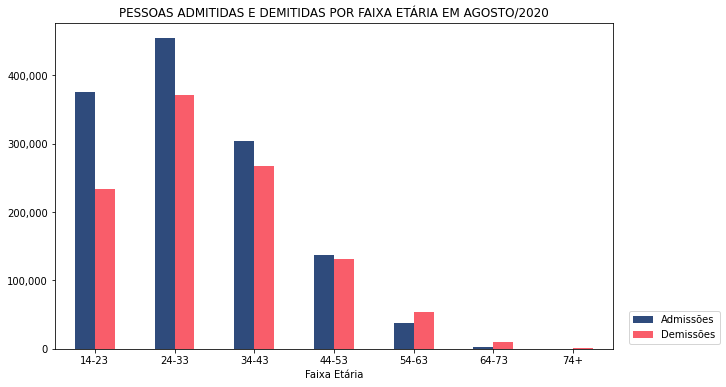

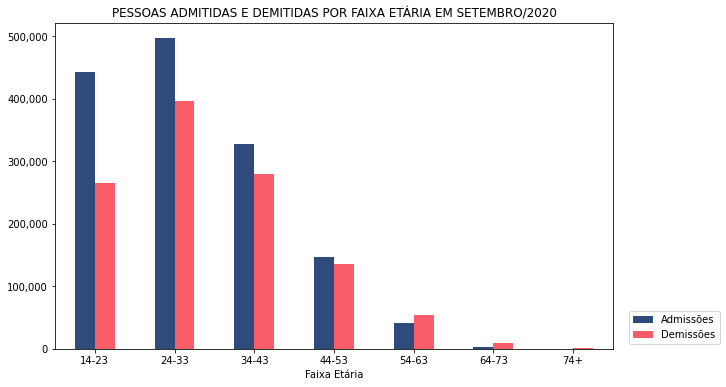

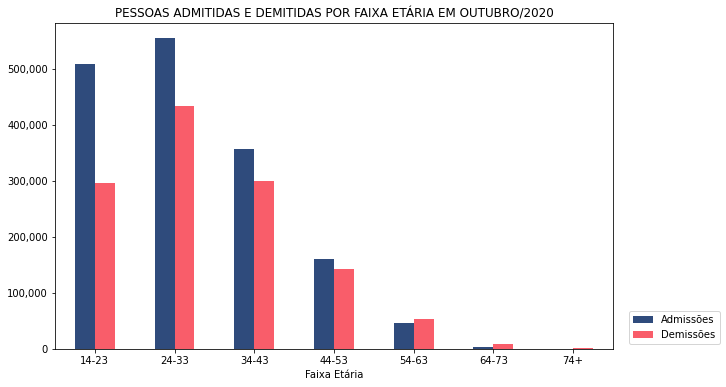

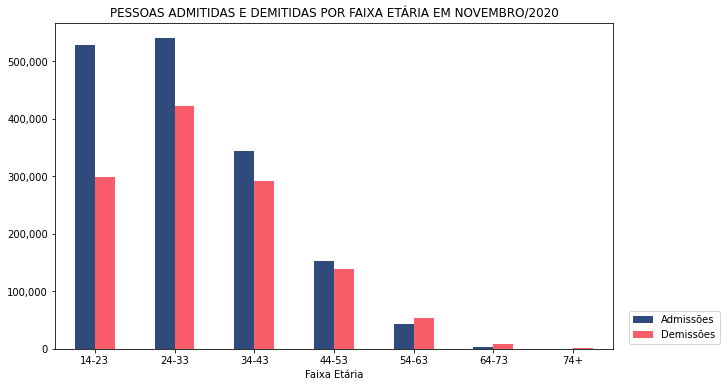

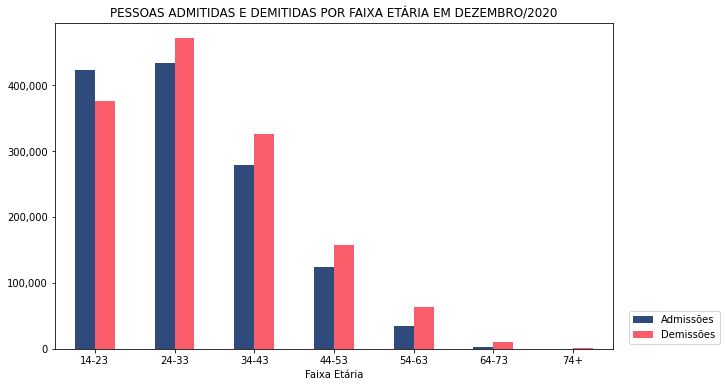

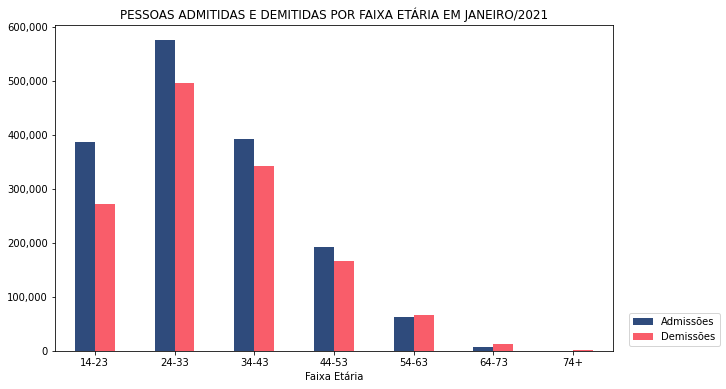

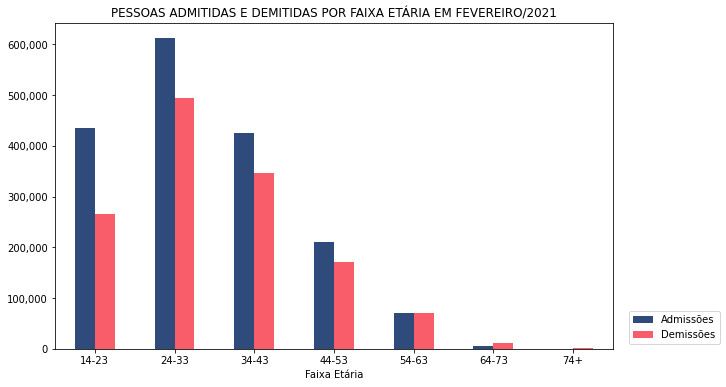

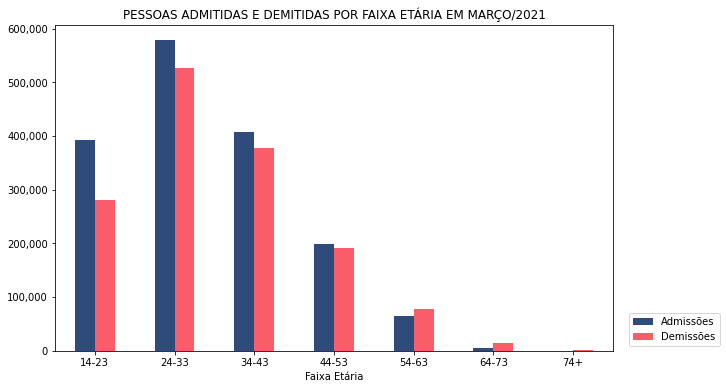

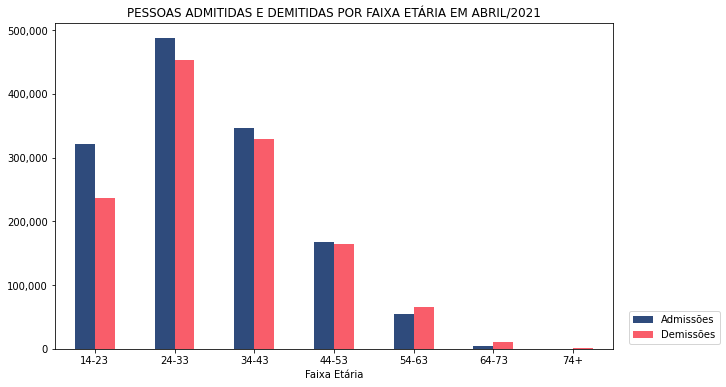

In [5]:
# cria gráficos para cada mês, de março/2020 a abril/2021

for arquivo in arquivos:
    pandemia_df = loadDataFrame(arquivo)
    questao01_df = prepareDataframe(pandemia_df, param)
    competencia = mes[str(arquivo)[12:-4]] + "/"+ str(arquivo)[8:-6]
    generateChart(questao01_df, 'Faixa Etária', competencia, "faixa etária")